In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c 'malware-classification'

100% 35.3G/35.3G [06:14<00:00, 84.6MB/s]
100% 35.3G/35.3G [06:14<00:00, 101MB/s] 


In [ ]:
import zipfile

In [ ]:
data=zipfile.ZipFile('malware-classification.zip')
data.extract('train.7z')

'/content/train.7z'

In [ ]:
!rm malware-classification.zip

In [ ]:
!rm *.bytes

rm: cannot remove '*.bytes': No such file or directory


In [ ]:
!7z e train.7z -o/content/byte_files *.bytes -r


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 18810691091 bytes (18 GiB)

Extracting archive: train.7z
--
Path = train.7z
Type = 7z
Physical Size = 18810691091
Headers Size = 339764
Method = LZMA:24
Solid = +
Blocks = 94

  0%      0% . train/kQEbWRHa04gOYDqM1NJ6.asm                                       0% 1 . train/KqEgONxfHdP5lLaBIGQk.asm                                         0% 2 . train/kqiOdVbRQlB2s907GLMv.asm                                         0% 5 . train/kQsiVxDbAXt23wRWal57.asm

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
words='00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??'

In [ ]:
vocab=[]
for i in range(len(words.split(','))):
  a=words.split(',')[i]
  for j in range(len(words.split(','))):
    b=words.split(',')[j]
    vocab.append(str(a)+' '+str(b))

In [ ]:
unigram_vocab=[i for i in words.split(',')]
print(len(unigram_vocab))

257


In [ ]:
len(vocab)

66049

In [ ]:
!gdown 1Ide8DoiRbHoHIX9Vbgu9ZdYb8dnljZ0-

Downloading...
From: https://drive.google.com/uc?id=1Ide8DoiRbHoHIX9Vbgu9ZdYb8dnljZ0-
To: /content/trainLabels.csv
100% 272k/272k [00:00<00:00, 67.4MB/s]


In [ ]:
Y=pd.read_csv('trainLabels.csv')
Y.head()

,Id,Class
0,01kcPWA9K2BOxQeS5Rju,1
1,04EjIdbPV5e1XroFOpiN,1
2,05EeG39MTRrI6VY21DPd,1
3,05rJTUWYAKNegBk2wE8X,1
4,0AnoOZDNbPXIr2MRBSCJ,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

In [ ]:
vectorizer=CountVectorizer(ngram_range=(2,2),vocabulary=vocab,lowercase=False)

In [ ]:
import os

In [ ]:
import scipy

In [ ]:
files=os.listdir('byte_files')

In [ ]:
import tqdm

In [ ]:
files=os.listdir('byte_files')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
fnames=[]
file=files[0]
f = open('byte_files/' + file)
matrix=vectorizer.fit_transform([f.read().replace('\n', ' ').lower()])
f.close()
file=file.split('.')[0]
if any(file == filename for filename in filenames):
  loc=filenames.index(file)
  class_bytes.append(class_y[loc])
  fnames.append(file)
for i in tqdm.tqdm(range(1,len(files))):
  f = open('byte_files/' + files[i])
  vec=vectorizer.fit_transform([f.read().replace('\n', ' ').lower()])
  f.close()
  matrix=scipy.sparse.hstack((matrix,vec))
  file=files[i].split('.')[0]
  if any(file == filename for filename in filenames):
      loc=filenames.index(file)
      class_bytes.append(class_y[loc])
      fnames.append(file)

100%|██████████| 10867/10867 [14:52:36<00:00,  4.93s/it]


In [ ]:
scipy.sparse.save_npz('/content/drive/MyDrive/Kaggle/sparsebyte.npz',matrix)

In [ ]:
import pickle

In [ ]:
with open("/content/drive/MyDrive/Kaggle/fnames", "wb") as fp:   #Pickling
  pickle.dump(fnames, fp)

In [ ]:
with open("/content/drive/MyDrive/Kaggle/", "wb") as fp:   #Pickling
  pickle.dump(class_bytes, fp)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
byte_matrix=scipy.sparse.load_npz('/content/drive/MyDrive/Kaggle/sparsebyte.npz')

NameError: ignored

In [ ]:
byte_matrix=byte_matrix.reshape((10868,-1))

# **Extracting UNIGRAMS:**

In [ ]:
filenames=pickle.load(open("/content/drive/MyDrive/Kaggle/fnames", "rb"))

In [ ]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.7 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 357 kB 65.0 MB/s 
     |████████████████████████████████| 138 kB 64.1 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 2.4 MB 62.9 MB/s 
     |████████████████████████████████| 2.3 MB 69.2 MB/s 


In [ ]:
import py7zr

In [ ]:
f=py7zr.SevenZipFile(f"train.7z", mode='r')

In [ ]:
!7z e train.7z -o/content/byte_files *.bytes -r


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 18810691091 bytes (18 GiB)

Extracting archive: train.7z
--
Path = train.7z
Type = 7z
Physical Size = 18810691091
Headers Size = 339764
Method = LZMA:24
Solid = +
Blocks = 94

  0%      0% . train/kQEbWRHa04gOYDqM1NJ6.asm                                       0% 1 . train/KqEgONxfHdP5lLaBIGQk.asm                                         0% 2 . train/kqiOdVbRQlB2s907GLMv.asm                                         0% 5 . train/kQsiVxDbAXt23wRWal57.asm

In [ ]:
vectorizer2=CountVectorizer(ngram_range=(1,1),vocabulary=unigram_vocab,lowercase=False)

In [ ]:
f = open('byte_files/' + files[0])
vec=vectorizer2.fit_transform([f.read().replace('\n', ' ').lower()])
f.close()

In [ ]:
vec.toarray().shape

(1, 257)

In [ ]:
unigram_matrix=np.zeros((10868,257))

In [ ]:
files=[i+'.bytes' for i in filenames]
for i in tqdm.tqdm(range(0,len(files))):
  f = open('byte_files/' + files[i])
  unigram_matrix[i]=(vectorizer2.fit_transform([f.read().replace('\n', ' ').lower()])).toarray()
  f.close()

100%|██████████| 10868/10868 [1:41:23<00:00,  1.79it/s]


In [ ]:
np.save('/content/drive/MyDrive/Kaggle/unigrams.npy',unigram_matrix)

In [ ]:
!rm -rf byte_files

# **Pixel Intensity Feature extraction**

In [ ]:
#len(asm_f)

In [ ]:
import array
import codecs

In [ ]:
!rm -rf asm_files

In [ ]:
import pickle

In [ ]:
with open("/content/drive/MyDrive/Kaggle/fnames", "rb") as fp:   # Unpickling
   filenames = pickle.load(fp)
fp.close()   

In [ ]:
!rm -rf asmbatch

In [ ]:
import py7zr

In [ ]:
f=py7zr.SevenZipFile(f"train.7z", mode='r')

In [ ]:
files=filenames[5000:]
files=['train/'+i+'.asm' for i in files]

In [ ]:
f.extract('asmbatch',targets=files)

In [ ]:
!rm -rf asmbatch

In [ ]:
len(os.listdir('asmbatch/train'))

5868

In [ ]:
images=np.zeros((10868,800))

In [ ]:
count=5000
for file in tqdm.tqdm(files):
    f = codecs.open('asmbatch/' + file,'rb')
    ln=os.path.getsize('asmbatch/' +file)
    width=int(ln**0.5)
    rem=ln%width
    a=array.array('B')
    a.fromfile(f,ln-rem)
    f.close()
    g=np.reshape(a,(int(len(a)/width),width))
    g=np.uint8(g)
    g=g.flatten()[:800]
    images[count]+=g
    count+=1

100%|██████████| 5868/5868 [08:01<00:00, 12.19it/s]


In [ ]:
images[5001]

array([ 72.,  69.,  65.,  68.,  69.,  82.,  58.,  48.,  48.,  52.,  48.,
        48.,  48.,  48.,  48.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
        59.,  13.,  10.,  72.,  69.,  65.,  68.,  69.,  82.,  58.,  48.,
        48.,  52.,  48.,  48.,  48.,  48.,  48.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,  59.,  32.,  43.,  45.,  45.,  45.,  45.,  45.,
        45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,
        45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,
        45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,
        45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,
        45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,
        45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,
        45.,  45.,  43.,  13.,  10.,  72.,  69.,  65.,  68.,  69.,  82.,
        58.,  48.,  48.,  52.,  48.,  48.,  48.,  48.,  48.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,  59.,  32., 12

In [ ]:
print(images.shape)

(10868, 800)


In [ ]:
np.save('/content/drive/MyDrive/Kaggle/asmdensematrixnew.npy',images)

# **Loading numpy arrays created for both byte files and asm files**

In [ ]:
from scipy import sparse
import numpy as np
import pickle
import scipy
import pandas as pd

In [ ]:
byte_matrix=scipy.sparse.load_npz('/content/drive/MyDrive/Kaggle/sparsebyte.npz')

In [ ]:
byte_matrix=byte_matrix.reshape((10868,-1))

In [ ]:
asm_vec=np.load('/content/drive/MyDrive/Kaggle/only_asm.npy',allow_pickle=True)

In [ ]:
asm_matrix=np.load('/content/drive/MyDrive/Kaggle/asmdensematrixnew.npy',allow_pickle=True)

In [ ]:
unigram=np.load('/content/drive/MyDrive/Kaggle/unigrams.npy',allow_pickle=True)

In [ ]:
print(byte_matrix.shape,asm_matrix.shape,unigram.shape,asm_vec.shape)

(10868, 66049) (10868, 800) (10868, 257) (10868, 51)


In [ ]:
bigrams=byte_matrix.toarray()[:,:2000]

In [ ]:
print(bigrams.shape)

(10868, 2000)


In [ ]:
del byte_matrix

In [ ]:
#final_matrix=scipy.sparse.hstack((unigram,bigrams,asm_matrix))

ValueError: ignored

In [ ]:
final_matrix=np.hstack((unigram,bigrams,asm_vec,asm_matrix))

In [ ]:
final_matrix.shape

(10868, 3108)

In [ ]:
del byte_matrix

In [ ]:
with open('/content/drive/MyDrive/Kaggle/class_bytes', "rb") as fp:   # Unpickling
   y = pickle.load(fp)
fp.close() 

In [ ]:
#!gdown 115fBXIIGhZXSI6WPrVOKCkOC2iUhVr2b

Downloading...
From: https://drive.google.com/uc?id=115fBXIIGhZXSI6WPrVOKCkOC2iUhVr2b
To: /content/asmoutputfile.csv
100% 1.94M/1.94M [00:00<00:00, 165MB/s]


In [ ]:
#asm_features=pd.read_csv('/content/asmoutputfile.csv')

In [ ]:
#del asm_features

In [ ]:
# vec=asm_features.loc[asm_features.ID==filenames[0]]
# print(vec.values[:,1:])

[[0 81329 0 687 25279 0 24657 0 0 0 0 0 0 46 500 1 189 100 54 121 0 79 55
  36 105 1 0 59 10 98 129 44 1 2 8 56 0 77 12 309 240 488 131 332 164 391
  290 0 22 0 254]]


In [ ]:
#asm_vec=np.zeros((10868,51))

In [ ]:
# count=0
# for i in filenames:
#   vec=asm_features.loc[asm_features.ID==i]
#   asm_vec[count]=np.array(vec.values[:,1:],dtype='float').reshape((-1,51))
#   count+=1

In [ ]:
#np.save('/content/drive/MyDrive/Kaggle/only_asm.npy',asm_vec)

In [ ]:
len(y)

10868

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_matrix,y,test_size=0.2,random_state=1,stratify=y)

In [ ]:
del final_matrix

In [ ]:
!pip install xgboost --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 39 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
x_cfl=XGBClassifier(n_estimators=25,max_depth=10,learning_rate=0.15,colsample_bytree=0.3,subsample=1,nthread=-1)
x_cfl.fit(X_train,y_train,verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=25,
              n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

In [ ]:
pickle.dump(x_cfl, open('/content/drive/MyDrive/Kaggle/xgboostmodel.sav', 'wb'))

In [ ]:
loaded_model = pickle.load(open('/content/drive/MyDrive/Kaggle/xgboostmodel.sav', 'rb'))

In [ ]:
calibrator = CalibratedClassifierCV(loaded_model, cv='prefit')
calibrator.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.3,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                            

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [ ]:
yhat = calibrator.predict_proba(X_test)

In [ ]:
print('Log Loss is :',log_loss(y_test,yhat))

Log Loss is : 0.02499343272118805


Number of misclassified points  0.3219871205151794
-------------------------------------------------- Confusion matrix --------------------------------------------------


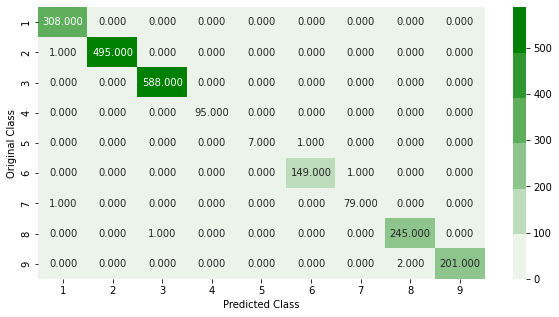

-------------------------------------------------- Precision matrix --------------------------------------------------


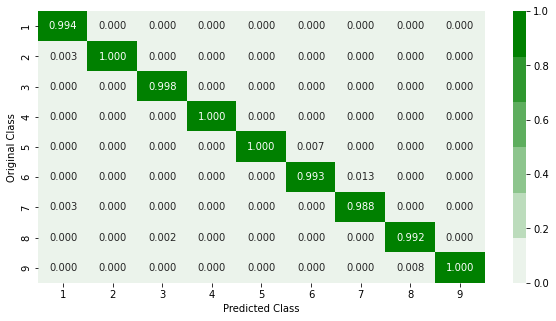

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


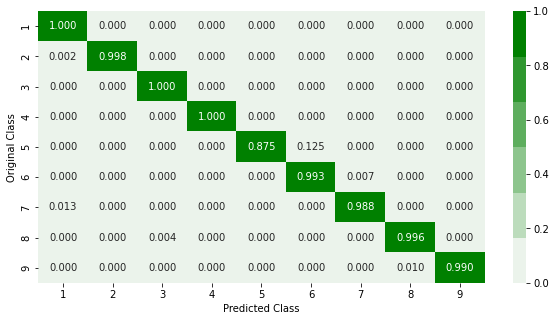

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test,calibrator.predict(X_test))